In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from os import listdir
from io import StringIO
import pickle
import datetime
import math
import sys
sys.path.insert(0, 'C:/Users/Betsy/Documents/TCD/cmevo/functions')
import cme_graphing

#First, identify the dates that we want
date1 = datetime.datetime(1996,12,19,18,30,5)
date2 = datetime.datetime(2000,3,7,16,30,5)

#Second, create the lists for those two days where we will store their values
day1=[]
day2=[]

day1=cme_graphing.find_file(date1)
day2=cme_graphing.find_file(date2)

print ("Data table for 1996 data: \n", day1)
print ("Data table for 2000 data: \n", day2)


Data table for 1996 data: 
              DATE_TIME  HEIGHT  ANGLE TEL  FC    COL    ROW
0  1996-12-19 18:30:05    2.76  237.1  C2   1  345.0  194.0
1  1996-12-19 21:55:02    4.87  245.8  C2   1  427.0  174.0
2  1996-12-19 22:18:11    4.92  242.8  C3   1  297.0  246.0
3  1996-12-19 22:30:05    5.36  246.4  C2   1  445.0  168.0
4  1996-12-19 23:45:06    5.90  243.9  C3   1  305.0  243.0
5  1996-12-20 01:15:05    6.62  244.7  C3   1  311.0  241.0
6  1996-12-20 02:45:05    7.60  245.3  C3   1  319.0  238.0
7  1996-12-20 04:18:08    8.78  244.7  C3   1  328.0  233.0
8  1996-12-20 05:45:06    9.76  245.1  C3   1  336.0  230.0
9  1996-12-20 07:21:32   11.20  244.6  C3   1  347.0  224.0
10 1996-12-20 08:45:05   12.23  243.3  C3   1  354.0  218.0
11 1996-12-20 13:25:46   16.43  246.5  C3   1  390.0  209.0
12 1996-12-20 15:22:47   18.09  246.4  C3   1  403.0  203.0
Data table for 2000 data: 
              DATE_TIME  HEIGHT  ANGLE TEL  FC    COL    ROW
0  2000-03-07 16:30:05    3.72  113.3  C2   

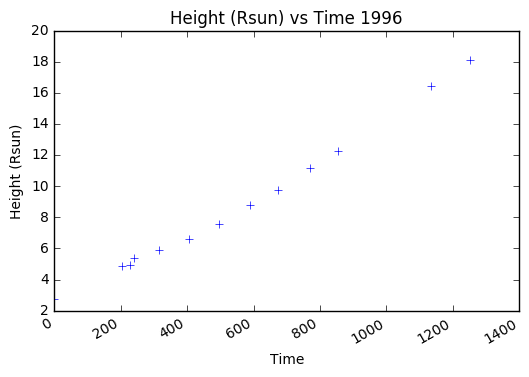

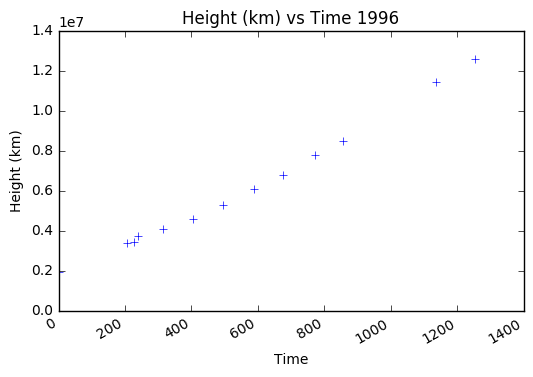

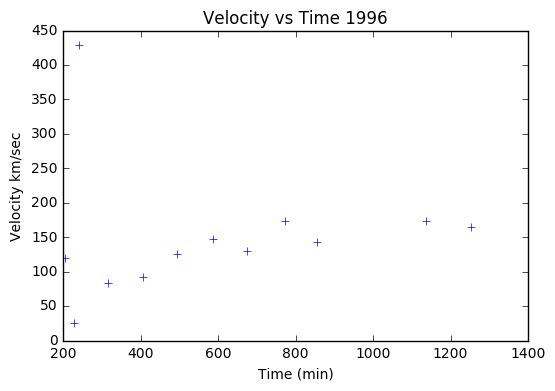

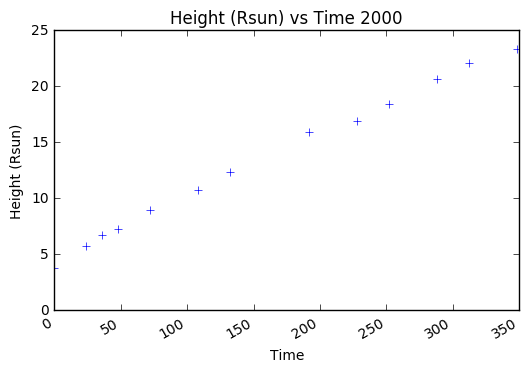

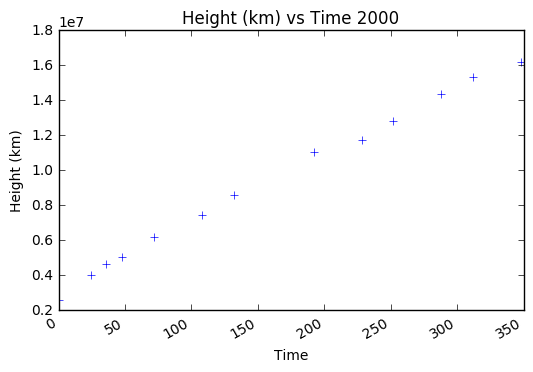

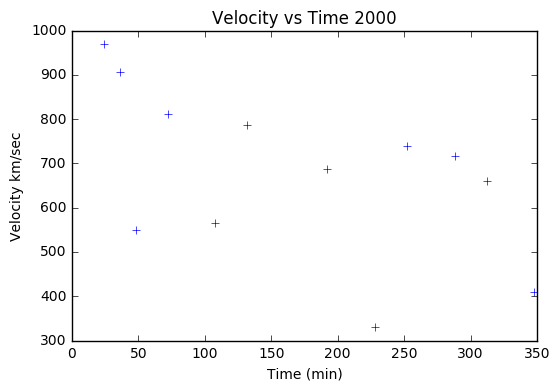

In [2]:
cme_graphing.height_velocity_graphs(day1, str(date1.year))
cme_graphing.height_velocity_graphs(day2, str(date2.year))